### 导入包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix,roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

### 导入数据、归一化、划分训练集测试集

In [2]:
data=pd.read_csv('./clean-data.csv')
data=data.drop(['Unnamed: 0'],axis=1)
X=data.drop(['Group'],axis=1)
y=data['Group']

In [3]:
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_pre=sc.fit_transform(X)
X_pre=pd.DataFrame(data=X_pre,columns=column)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_pre,y,test_size=0.2,random_state=50,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (132, 203)
Test shape: (33, 203)


### 交叉验证函数

In [5]:
def crosspredict(estimator,Xtrain,ytrain,cv):
    print("cross-validate across the entire data set")
    y_pred_cross=cross_val_predict(estimator,Xtrain,ytrain,cv=cv)
    confusion_cross=confusion_matrix(ytrain,y_pred_cross)
    a=accuracy_score(ytrain,y_pred_cross)
    p=precision_score(ytrain, y_pred_cross)
    r=recall_score(ytrain, y_pred_cross)
    f1=f1_score(ytrain, y_pred_cross)
    wf1=f1_score(ytrain, y_pred_cross, average='weighted')
    print('the confusion_matrix of the model is : \n',confusion_cross)
    print('the accuracy of the model is : ',a)
    print("the precision score of the model is : ", p)
    print("the recall score of the model is :", r)
    print('the f1_score of the model  is :',f1)
    print('the weighted_f1 of the model is :',wf1)
    print('the classification_report is :\n',classification_report(ytrain, y_pred_cross,digits=4))
    return a,p,r,f1,wf1,y_pred_cross,ytrain

In [6]:
def crosspredict_proba(estimator,Xtrain,ytrain,cv):
    print("cross-validate across the entire data set")
    y_pred_proba=cross_val_predict(estimator,Xtrain,ytrain,cv=cv,method='predict_proba')
    return y_pred_proba 

In [44]:
clf1=SVC(C=1, coef0=10, degree=4, kernel='poly', probability=True)
clf2=KNeighborsClassifier(n_neighbors=13)
clf3=LogisticRegression(C=0.1)
clf4=GaussianNB()
clf5=BernoulliNB()
clf6=DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6)
clf7=RandomForestClassifier(max_depth=8, n_estimators=105, n_jobs=-1,random_state=90)
clf8=AdaBoostClassifier(learning_rate=0.1)
clf9=GradientBoostingClassifier(loss='exponential', n_estimators=300)
clf10=XGBClassifier(booster='gblinear',learning_rate=0.3,n_estimators=10)
clf11=lgb.LGBMClassifier(max_depth=3, n_estimators=300)

In [72]:
yuan1=SVC()
yuan2=KNeighborsClassifier()
yuan3=LogisticRegression()
yuan4=GaussianNB()
yuan6=DecisionTreeClassifier()
yuan7=RandomForestClassifier(random_state=6)
yuan8=AdaBoostClassifier()
yuan9=GradientBoostingClassifier()
yuan10=XGBClassifier()
yuan11=lgb.LGBMClassifier()

In [9]:
from sklearn.base import ClassifierMixin
from sklearn.base import TransformerMixin, BaseEstimator
class MyEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self, model, mask) -> None:
        super().__init__()
        self.mask = mask
        self.model = model
    
    def fit(self, X, y=None):
        self.model.fit(X[self.mask],y)
        self.classes_ = self.model.classes_
        return self

    def predict(self, X):
        return self.model.predict(X[self.mask])
    
    def predict_proba(self,X):
        return self.model.predict_proba(X[self.mask])

In [60]:
sel_seq_dt_mask=['APG_0101010010M','APG_0101010055P','APG_0101010063M','APG_0101010341M','APG_0101010354P']
sel_seq_rf_mask=['APG_0101010055P','APG_0101010262P','APG_0101010266P']
sel_seq_ada_mask=['APG_0101010033M','APG_0101010063M','APG_0101010067M','APG_0101010147M','APG_0101010192M', 'APG_0101010236M']
sel_seq_gb_mask=['APG_0101010002M','APG_0101010055P','APG_0101010266P','APG_0101010354P']
sel_seq_xgb_mask=['APG_0101010010M','APG_0101010037P','APG_0101010063M','APG_0101010078P','APG_0101010150P','APG_0101010230P','APG_0101010279P','APG_0101010312P','APG_0101020013M']
sel_seq_KN_mask=['APG_0101010002M', 'APG_0101010010M', 'APG_0101010052M','APG_0101010055P', 'APG_0101010176P']
sel_seq_Lightgbm_mask=['APG_0101010036M','APG_0101010078P','APG_0101010130P','APG_0101010192M','APG_0101010226P','APG_0101010242P','APG_0101010265P']
sel_seq_SVC_mask=['APG_0101010002M', 'APG_0101010010M', 'APG_0101010037P', 'APG_0101010039M', 'APG_0101010055P', 'APG_0101010143P', 'APG_0101010247P', 'APG_0101010300P', 'APG_0101010332P']
sel_seq_GNB_mask=['APG_0101010010M','APG_0101010055P','APG_0101010057M','APG_0101010081M','APG_0101010085P','APG_0101010199P','APG_0101010264P','APG_0101010279P', 'APG_0101010300P']
sel_seq_lr_mask=['APG_0101010010M','APG_0101010030M','APG_0101010041M','APG_0101010043P','APG_0101010137P','APG_0101010150P','APG_0101010152M','APG_0101010168P','APG_0101010176P','APG_0101010356P']

model_dt_fs = MyEstimator(DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6), sel_seq_dt_mask)
model_rf_fs = MyEstimator(RandomForestClassifier(max_depth=8, n_estimators=105, n_jobs=-1,random_state=90), sel_seq_rf_mask)
model_ada_fs = MyEstimator(AdaBoostClassifier(learning_rate=0.1), sel_seq_ada_mask)
model_gb_fs = MyEstimator(GradientBoostingClassifier(loss='exponential', n_estimators=300), sel_seq_gb_mask)
model_xgb_fs = MyEstimator(XGBClassifier(booster='gblinear',learning_rate=0.3,n_estimators=10), mask=sel_seq_xgb_mask)
model_KN_fs = MyEstimator(KNeighborsClassifier(n_neighbors=3, p=1), mask=sel_seq_KN_mask)

model_Lightgbm_fs = MyEstimator(lgb.LGBMClassifier(max_depth=3, n_estimators=300), mask=sel_seq_Lightgbm_mask)
model_SVC_fs = MyEstimator(SVC(C=1, coef0=10, degree=4, kernel='poly', probability=True),mask=sel_seq_SVC_mask)
model_GNB_fs = MyEstimator(GaussianNB(),mask=sel_seq_GNB_mask)
model_lr_fs = MyEstimator(LogisticRegression(C=0.1),mask=sel_seq_lr_mask)

In [12]:
print("SVM")
a,b,c,d,e,f,g=crosspredict(yuan1,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_SVC_fs,X_pre,y,10)
print("KNN")
a,b,c,d,e,f,g=crosspredict(yuan2,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_KN_fs,X_pre,y,10)
print("LR")
a,b,c,d,e,f,g=crosspredict(yuan3,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_lr_fs,X_pre,y,10)
print("GNB")
a,b,c,d,e,f,g=crosspredict(yuan4,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_GNB_fs ,X_pre,y,10)
print("DT")
a,b,c,d,e,f,g=crosspredict(yuan6,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_dt_fs ,X_pre,y,10)
print("RF")
a,b,c,d,e,f,g=crosspredict(yuan7,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_rf_fs,X_pre,y,10)
print("Ada")
a,b,c,d,e,f,g=crosspredict(yuan8,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_ada_fs,X_pre,y,10)
print("GBDT")
a,b,c,d,e,f,g=crosspredict(yuan9,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_gb_fs,X_pre,y,10)
print("XGB")
a,b,c,d,e,f,g=crosspredict(yuan10,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_xgb_fs,X_pre,y,10)
print("LGB")
a,b,c,d,e,f,g=crosspredict(yuan11,X,y,10)
a,b,c,d,e,f,g=crosspredict(model_Lightgbm_fs,X_pre,y,10)

SVM
cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[64 14]
 [44 43]]
the accuracy of the model is :  0.6484848484848484
the precision score of the model is :  0.7543859649122807
the recall score of the model is : 0.4942528735632184
the f1_score of the model  is : 0.5972222222222222
the weighted_f1 of the model is : 0.6402166829586183
the classification_report is :
               precision    recall  f1-score   support

           0     0.5926    0.8205    0.6882        78
           1     0.7544    0.4943    0.5972        87

    accuracy                         0.6485       165
   macro avg     0.6735    0.6574    0.6427       165
weighted avg     0.6779    0.6485    0.6402       165

cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[69  9]
 [24 63]]
the accuracy of the model is :  0.8
the precision score of the model is :  0.875
the recall score of the model is : 0.7241379310344828
the f1_score of the model  is :

the confusion_matrix of the model is : 
 [[57 21]
 [32 55]]
the accuracy of the model is :  0.6787878787878788
the precision score of the model is :  0.7236842105263158
the recall score of the model is : 0.632183908045977
the f1_score of the model  is : 0.6748466257668712
the weighted_f1 of the model is : 0.678528275295477
the classification_report is :
               precision    recall  f1-score   support

           0     0.6404    0.7308    0.6826        78
           1     0.7237    0.6322    0.6748        87

    accuracy                         0.6788       165
   macro avg     0.6821    0.6815    0.6787       165
weighted avg     0.6843    0.6788    0.6785       165

cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[56 22]
 [15 72]]
the accuracy of the model is :  0.7757575757575758
the precision score of the model is :  0.7659574468085106
the recall score of the model is : 0.8275862068965517
the f1_score of the model  is : 0.7955801104972374


[LightGBM] [Info] Number of positive: 78, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9303
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 203
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527027 -> initscore=0.108214
[LightGBM] [Info] Start training from score 0.108214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 78, number of negative: 71
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9363
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 203
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523490 -> initscore=0.094029
[LightGBM] [Info] Start training from score 0.094029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 78, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527027 -> initscore=0.108214
[LightGBM] [Info] Start training from score 0.108214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [11]:
from itertools import *
feature=list(set(sel_seq_dt_mask+sel_seq_rf_mask+sel_seq_ada_mask+sel_seq_GNB_mask+sel_seq_xgb_mask))
model_dt_fs = MyEstimator(DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6), sel_seq_dt_mask)
model_rf_fs = MyEstimator(RandomForestClassifier(max_depth=8, n_estimators=105, n_jobs=-1,random_state=90), sel_seq_rf_mask)
model_ada_fs = MyEstimator(AdaBoostClassifier(learning_rate=0.1), sel_seq_ada_mask)
model_xgb_fs = MyEstimator(XGBClassifier(booster='gblinear',learning_rate=0.3,n_estimators=10), mask=sel_seq_xgb_mask)
model_gnb_fs=MyEstimator(GaussianNB(),mask=sel_seq_GNB_mask)
from sklearn.ensemble import VotingClassifier
model_voting_hard = VotingClassifier([
    ("dt",model_dt_fs),
    ("rf",model_rf_fs),
    ("ada", model_ada_fs),
    ("xgb", model_xgb_fs),
    ("gnb",model_gnb_fs),
], voting="hard")

In [28]:
a,b,c,d,e,y_scores_voting,y_true=crosspredict(model_voting_hard,X_pre,y,10)

cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[76  2]
 [16 71]]
the accuracy of the model is :  0.8909090909090909
the precision score of the model is :  0.9726027397260274
the recall score of the model is : 0.8160919540229885
the f1_score of the model  is : 0.8875
the weighted_f1 of the model is : 0.8906283422459892
the classification_report is :
               precision    recall  f1-score   support

           0     0.8261    0.9744    0.8941        78
           1     0.9726    0.8161    0.8875        87

    accuracy                         0.8909       165
   macro avg     0.8993    0.8952    0.8908       165
weighted avg     0.9033    0.8909    0.8906       165



In [12]:
from mlxtend.classifier import StackingClassifier
model_Stacking_cross = StackingClassifier(classifiers=[
    (model_dt_fs),
    (model_rf_fs ),
    (model_ada_fs),
    (model_gnb_fs),
    (model_xgb_fs),
],meta_classifier=LogisticRegression(C=0.1))

In [17]:
a,b,c,d,e,y_scores_voting,y_true=crosspredict(model_Stacking_cross,X_pre,y,10)

cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[72  6]
 [12 75]]
the accuracy of the model is :  0.8909090909090909
the precision score of the model is :  0.9259259259259259
the recall score of the model is : 0.8620689655172413
the f1_score of the model  is : 0.8928571428571429
the weighted_f1 of the model is : 0.890981240981241
the classification_report is :
               precision    recall  f1-score   support

           0     0.8571    0.9231    0.8889        78
           1     0.9259    0.8621    0.8929        87

    accuracy                         0.8909       165
   macro avg     0.8915    0.8926    0.8909       165
weighted avg     0.8934    0.8909    0.8910       165



In [13]:
from scipy import stats
def cal_sd_ci_p_1(model,X,y):
         # 使用cross_val_predict获取整个数据集的预测值
    predictions = cross_val_predict(model, X, y, cv=10)

    # 计算整体的准确率
    overall_accuracy = accuracy_score(y, predictions)
    overall_precision = precision_score(y, predictions)
    overall_recall = recall_score(y, predictions)
    overall_f1= f1_score(y, predictions)

    # 初始化一个列表来存储每一折的准确率
    fold_accuracies = []
    fold_precisions=[]
    fold_recalls=[]
    fold_f1s=[]

    # 进行十折交叉验证并计算每一折的准确率
    for i in range(10):
        # 获取第i折的测试集的索引
        test_index = (np.arange(len(y)) % 10 == i)

        # 获取第i折的测试集的真实标签和预测标签
        y_true = y[test_index]
        y_pred = predictions[test_index]

        # 计算第i折的准确率并添加到列表中
        fold_accuracy = accuracy_score(y_true, y_pred)
        fold_accuracies.append(fold_accuracy)
        
        fold_precision = precision_score(y_true, y_pred)
        fold_precisions.append(fold_precision)
        
        fold_recall = recall_score(y_true, y_pred)
        fold_recalls.append(fold_recall)
        
        fold_f1 = f1_score(y_true, y_pred)
        fold_f1s.append(fold_f1)

    # 计算标准偏差
    std_dev_acc = np.std(fold_accuracies)
    std_dev_pre = np.std(fold_precisions)
    std_dev_rec = np.std(fold_recalls)
    std_dev_f1 = np.std(fold_f1s)

    # 计算95%置信区间
    confidence_interval_acc = stats.t.interval(0.95, len(fold_accuracies)-1, loc=np.mean(fold_accuracies), scale=stats.sem(fold_accuracies))
    confidence_interval_pre = stats.t.interval(0.95, len(fold_precisions)-1, loc=np.mean(fold_precisions), scale=stats.sem(fold_precisions))
    confidence_interval_rec = stats.t.interval(0.95, len(fold_recalls)-1, loc=np.mean(fold_recalls), scale=stats.sem(fold_recalls))
    confidence_interval_f1 = stats.t.interval(0.95, len(fold_f1s)-1, loc=np.mean(fold_f1s), scale=stats.sem(fold_f1s))

    print("accuracy")
    print("Fold accuracies:", fold_accuracies)
    print("Overall accuracy:", overall_accuracy)
    print("Standard deviation:", std_dev_acc)
    print("95% confidence interval:", confidence_interval_acc)
    print("precision")
    print("Fold precisions:", fold_precisions)
    print("Overall precision:", overall_precision)
    print("Standard deviation:", std_dev_pre)
    print("95% confidence interval:", confidence_interval_pre)
    print("recall")
    print("Fold recalls:", fold_recalls)
    print("Overall recall:", overall_recall)
    print("Standard deviation:", std_dev_rec)
    print("95% confidence interval:", confidence_interval_rec)
    print("f1")
    print("Fold f1s:", fold_f1s)
    print("Overall f1:", overall_f1)
    print("Standard deviation:", std_dev_f1)
    print("95% confidence interval:", confidence_interval_f1)
    
    return fold_accuracies,overall_accuracy,std_dev_acc,confidence_interval_acc,fold_precisions,overall_precision,std_dev_pre,confidence_interval_pre,fold_recalls,overall_recall,std_dev_rec,confidence_interval_rec,fold_f1s,overall_f1,std_dev_f1,confidence_interval_f1

In [2]:
df_std_ci = pd.DataFrame(columns=['Model', 'fold_accuracies', 'overall_accuracy','std_dev_acc','confidence_interval_acc',
                          'fold_precisions','overall_precision','std_dev_pre','confidence_interval_pre',
                          'fold_recalls','overall_recall','std_dev_rec','confidence_interval_rec',
                          'fold_f1s','overall_f1','std_dev_f1','confidence_interval_f1'])
yuanname=['SVC','KNN','LR','GNB','DT','RF','Ada','GBDT','XGB','LGB']
listname=['SVC+','KNN+','LR+','GNB+','DT+','RF+','Ada+','GBDT+','XGB+','LGB+']
modellist=[model_SVC_fs,model_KN_fs,model_lr_fs,model_GNB_fs,model_dt_fs,model_rf_fs,model_ada_fs,model_gb_fs,model_xgb_fs,model_Lightgbm_fs]

modelyuan=[yuan1,yuan2,yuan3,yuan4,yuan6,yuan7,yuan8,yuan9,yuan10,yuan11]

for i in range(10):
    print(i)
    a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(modelyuan[i],X_pre,y)
    df_std_ci =df_std_ci.append({'Model':yuanname[i], 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)
    print()
    a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(modellist[i],X_pre,y)
    df_std_ci =df_std_ci.append({'Model':listname[i], 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)

In [23]:
a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(model_Stacking_cross,X_pre,y)
df_std_ci =df_std_ci.append({'Model':'Stacking', 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)


accuracy
Fold accuracies: [0.7647058823529411, 0.8235294117647058, 0.8235294117647058, 0.9411764705882353, 0.9411764705882353, 0.875, 0.875, 1.0, 1.0, 0.875]
Overall accuracy: 0.8909090909090909
Standard deviation: 0.07389980240736611
95% confidence interval: (0.8361874422588932, 0.9476360871528714)
precision
Fold precisions: [0.7777777777777778, 0.875, 0.8, 1.0, 1.0, 1.0, 0.875, 1.0, 1.0, 1.0]
Overall precision: 0.9259259259259259
Standard deviation: 0.0868587614719692
95% confidence interval: (0.8672817213075689, 0.9982738342479865)
recall
Fold recalls: [0.7777777777777778, 0.7777777777777778, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.75, 0.875, 1.0, 1.0, 0.7777777777777778]
Overall recall: 0.8620689655172413
Standard deviation: 0.08616709649581165
95% confidence interval: (0.7975254951564685, 0.9274745048435316)
f1
Fold f1s: [0.7777777777777778, 0.823529411764706, 0.8421052631578948, 0.9411764705882353, 0.9411764705882353, 0.8571428571428571, 0.875, 1.0, 1.0, 0.8

In [24]:
a,b,c,d,e,f,g,h,j,k,l,m,n,o,p,q=cal_sd_ci_p_1(model_voting_hard,X_pre,y)
df_std_ci =df_std_ci.append({'Model':'voting', 'fold_accuracies':a, 'overall_accuracy':b,'std_dev_acc':c,'confidence_interval_acc':d,
                          'fold_precisions':e,'overall_precision':f,'std_dev_pre':g,'confidence_interval_pre':h,
                          'fold_recalls':j,'overall_recall':k,'std_dev_rec':l,'confidence_interval_rec':m,
                          'fold_f1s':n,'overall_f1':o,'std_dev_f1':p,'confidence_interval_f1':q},ignore_index=True)

accuracy
Fold accuracies: [0.8235294117647058, 0.8235294117647058, 0.8823529411764706, 0.9411764705882353, 0.9411764705882353, 0.875, 0.8125, 1.0, 1.0, 0.8125]
Overall accuracy: 0.8909090909090909
Standard deviation: 0.07110335938802734
95% confidence interval: (0.837560812676711, 0.9447921284997597)
precision
Fold precisions: [0.875, 1.0, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Overall precision: 0.9726027397260274
Standard deviation: 0.047324236215002285
95% confidence interval: (0.940703935580551, 1.012073842197227)
recall
Fold recalls: [0.7777777777777778, 0.6666666666666666, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.75, 0.625, 1.0, 1.0, 0.6666666666666666]
Overall recall: 0.8160919540229885
Standard deviation: 0.13059248886573893
95% confidence interval: (0.7168041997485095, 0.9137513558070458)
f1
Fold f1s: [0.823529411764706, 0.8, 0.8888888888888888, 0.9411764705882353, 0.9411764705882353, 0.8571428571428571, 0.7692307692307693, 1.0, 1.0, 0.8]
O

In [21]:
#early ensemble model
#sd ci



import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from skfeature.function.statistical_based import CFS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import StratifiedKFold

data=pd.read_csv('./clean-data.csv')
data=data.drop(['Unnamed: 0'],axis=1)
X=data.drop(['Group'],axis=1)
y=data['Group']
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(data=X,columns=column)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)


# 初始化一个列表来存储每一折的准确率
fold_accuracies = []
fold_precisions=[]
fold_recalls=[]
fold_f1s=[]
y_scores_early=[]
y_true_early=[]

# 1) 特征选择
# 根据论文，选择多个特征

X_new=X[['APG_0101010055P','APG_0101010262P','APG_0101010266P']]
X_arr=np.array(X)

# 2) 创建类平衡的集成
n_ensembles = 15  # 集成数量
kf = StratifiedKFold(n_splits=n_ensembles)

# 3) 代价敏感分类器
# 定义代价矩阵
#2371
# 9  3248
#45 2362
cost_matrix = np.array([[2, 3], [6,2]])

# 计算代价敏感权重
class_weights = {}
for i in range(len(np.unique(y))):
    class_weights[i] = cost_matrix[i, 1] / (cost_matrix[i, 1] + cost_matrix[i, 0])

# 4) 训练和评估模型
ensemble_results = []

for train_index, test_index in kf.split(X_new, y):
    X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 随机森林分类器
    early= RandomForestClassifier(n_estimators=80, class_weight=class_weights, random_state=42)
    early.fit(X_train, y_train)
    
    # 预测测试集
    y_pred =early.predict(X_test)
    
    # 预测测试集
    y_pred_proba = early.predict_proba(X_test)[:, 1]
    
    # 计算性能指标
    accuracy=accuracy_score(y_test,y_pred)
    weighted_f1=f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 计算代价
    cm = confusion_matrix(y_test, y_pred)
    cost = cm[0, 1] * cost_matrix[1, 0] + cm[1, 0] * cost_matrix[0, 1]
    total_samples = len(y_test)
    cost_sensitive_accuracy = 1 - (cost / total_samples)
    
    ensemble_results.append({
        'Accuracy':accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted_F1':weighted_f1,
        'Cost Sensitive Accuracy': cost_sensitive_accuracy
    })
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)
    y_scores_early.extend(y_pred_proba)
    y_true_early.extend(y_test)

# 打印每个集成的结果
for i, result in enumerate(ensemble_results):
    print(f"Ensemble {i+1} Results: {result}")

# 计算并打印所有集成的平均结果
average_results = {metric: np.mean([results[metric] for results in ensemble_results]) for metric in ensemble_results[0]}
print(f"Average Results: {average_results}")
# y_scores_early=crosspredict_proba(early,X,y,10)

    # 计算整体的准确率
overall_accuracy = average_results['Accuracy']
overall_precision = average_results['Precision']
overall_recall =average_results['Recall']
overall_f1= average_results['F1 Score']

# 计算标准偏差
std_dev_acc = np.std(fold_accuracies)
std_dev_pre = np.std(fold_precisions)
std_dev_rec = np.std(fold_recalls)
std_dev_f1 = np.std(fold_f1s)

    # 计算95%置信区间
confidence_interval_acc = stats.t.interval(0.95, len(fold_accuracies)-1, loc=np.mean(fold_accuracies), scale=stats.sem(fold_accuracies))
confidence_interval_pre = stats.t.interval(0.95, len(fold_precisions)-1, loc=np.mean(fold_precisions), scale=stats.sem(fold_precisions))
confidence_interval_rec = stats.t.interval(0.95, len(fold_recalls)-1, loc=np.mean(fold_recalls), scale=stats.sem(fold_recalls))
confidence_interval_f1 = stats.t.interval(0.95, len(fold_f1s)-1, loc=np.mean(fold_f1s), scale=stats.sem(fold_f1s))


print("accuracy")
print("Fold accuracies:", fold_accuracies)
print("Overall accuracy:", overall_accuracy)
print("Standard deviation:", std_dev_acc)
print("95% confidence interval:", confidence_interval_acc)
print("precision")
print("Fold precisions:", fold_precisions)
print("Overall precision:", overall_precision)
print("Standard deviation:", std_dev_pre)
print("95% confidence interval:", confidence_interval_pre)
print("recall")
print("Fold recalls:", fold_recalls)
print("Overall recall:", overall_recall)
print("Standard deviation:", std_dev_rec)
print("95% confidence interval:", confidence_interval_rec)
print("f1")
print("Fold f1s:", fold_f1s)
print("Overall f1:", overall_f1)
print("Standard deviation:", std_dev_f1)
print("95% confidence interval:", confidence_interval_f1)

Ensemble 1 Results: {'Accuracy': 0.9090909090909091, 'Precision': 0.8333333333333334, 'Recall': 1.0, 'F1 Score': 0.9090909090909091, 'Weighted_F1': 0.9090909090909091, 'Cost Sensitive Accuracy': 0.4545454545454546}
Ensemble 2 Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'Weighted_F1': 1.0, 'Cost Sensitive Accuracy': 1.0}
Ensemble 3 Results: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'Weighted_F1': 1.0, 'Cost Sensitive Accuracy': 1.0}
Ensemble 4 Results: {'Accuracy': 0.7272727272727273, 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1 Score': 0.8, 'Weighted_F1': 0.6961038961038962, 'Cost Sensitive Accuracy': -0.6363636363636365}
Ensemble 5 Results: {'Accuracy': 0.9090909090909091, 'Precision': 0.8571428571428571, 'Recall': 1.0, 'F1 Score': 0.923076923076923, 'Weighted_F1': 0.9075369075369075, 'Cost Sensitive Accuracy': 0.4545454545454546}
Ensemble 6 Results: {'Accuracy': 0.7272727272727273, 'Precision': 0.6666666666666666, 'Rec

In [22]:
df_std_ci =df_std_ci.append({'Model':'early ensemble model', 'fold_accuracies':fold_accuracies, 'overall_accuracy':overall_accuracy,'std_dev_acc':std_dev_acc,'confidence_interval_acc':confidence_interval_acc,
                          'fold_precisions':fold_precisions,'overall_precision':overall_precision,'std_dev_pre':std_dev_pre,'confidence_interval_pre':confidence_interval_pre,
                          'fold_recalls':fold_recalls,'overall_recall':overall_recall,'std_dev_rec':std_dev_rec,'confidence_interval_rec':confidence_interval_rec,
                          'fold_f1s':fold_f1s,'overall_f1':overall_f1,'std_dev_f1':std_dev_f1,'confidence_interval_f1':confidence_interval_f1},ignore_index=True)

accuracy
Fold accuracies: [0.6470588235294118, 0.6470588235294118, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.5625, 0.8125, 0.625, 0.75, 0.6875]
Overall accuracy: 0.7143382352941177
Standard deviation: 0.0883738189576677
95% confidence interval: (0.6476997461094964, 0.7809767244787389)
precision
Fold precisions: [0.6666666666666666, 0.6, 0.75, 0.8, 0.6923076923076923, 0.5555555555555556, 0.7777777777777778, 0.6, 0.7777777777777778, 0.6666666666666666]
Overall precision: 0.6886752136752137
Standard deviation: 0.08152413687356504
95% confidence interval: (0.6272017436202763, 0.7501486837301511)
recall
Fold recalls: [0.6666666666666666, 1.0, 1.0, 0.8888888888888888, 1.0, 0.625, 0.875, 0.75, 0.7777777777777778, 0.8888888888888888]
Overall recall: 0.8472222222222221
Standard deviation: 0.1305851030393684
95% confidence interval: (0.7487542134929629, 0.9456902309514813)
f1
Fold f1s: [0.6666666666666666, 0.7499999999999999, 0.8571428571428571, 0.8421052631578948, 0.81818181

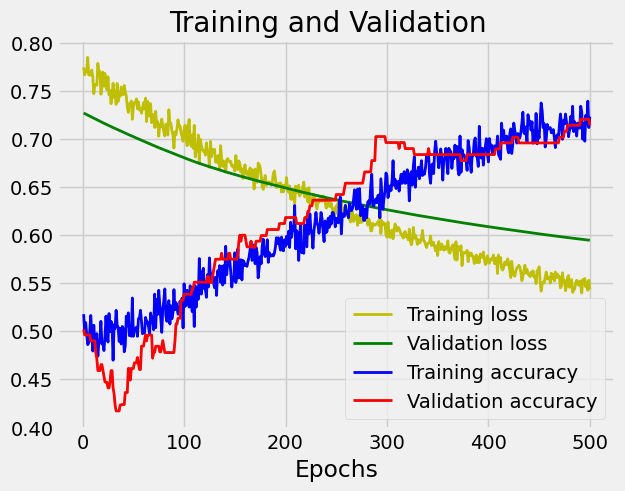

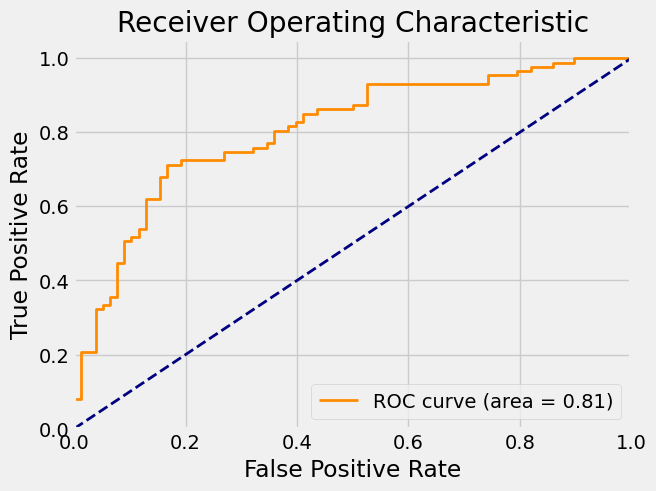

In [24]:
#deep learning model std ci
#run

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Input, concatenate
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from tensorflow.keras.callbacks import ReduceLROnPlateau

data=pd.read_csv('./clean-data.csv')
data=data.drop(['Unnamed: 0'],axis=1)
X=data.drop(['Group'],axis=1)
y=data['Group']
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(data=X,columns=column)

accuracy_tr=[]
accuracy_te=[]
loss_tr=[]
loss_te=[]

# 对特征进行标准化处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 训练LASSO回归模型，并获取系数
lasso = Lasso(alpha=0.05)
lasso.fit(X, y)
coefs = lasso.coef_

# 选择系数不为0的特征
selected_features = X[:, coefs != 0]
X = selected_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
accuracy_scores_tt = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

train_loss=[]
val_loss=[]
train_accuracy=[]
val_accuracy=[]
y_true_test_deep=[]
y_pred_probs_deep=[]

train_acc1=[]
train_loss1=[]
test_acc1=[]
test_loss1=[]

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=84)

for train_idx, test_idx in kfold.split(X, y):
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]

    models = []
    kk=3

        # 重塑数据以匹配 Conv1D 层的期望输入
    X_train = X_train.reshape((-1, X_train.shape[1], 1))
    X_test = X_test.reshape((-1, X_test.shape[1], 1))

    for i in range(kk):
        model = Sequential()
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        models.append(model)

    first_layer_train = np.zeros((len(X_train), kk))
    first_layer_test = np.zeros((len(X_test), kk))

    for i, model in enumerate(models):
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
        
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        history1=model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
        y_pred_train = model.predict(X_train).ravel()
        first_layer_train[:, i] = y_pred_train
        y_pred_test = model.predict(X_test).ravel()
        first_layer_test[:, i] = y_pred_test

    input_layer = Input(shape=(kk,))
    x = Dense(16, activation='relu')(input_layer)
    x=Dropout(0.7)(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    nn_model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
#     nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy','precision','recall', 'f1_score', 'roc_auc'])
    nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history =nn_model.fit(first_layer_train, y_train, epochs=500, batch_size=16, verbose=0,validation_data=(first_layer_test, y_test)
#                           ,callbacks=[reduce_lr]
                         )

    train_loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])
    train_accuracy.append(history.history['accuracy'])
    val_accuracy.append(history.history['val_accuracy'])

    
    train_acc1.append(np.mean(train_accuracy))
    test_acc1.append(np.mean(val_accuracy))
    train_loss1.append(np.mean(train_loss))
    test_loss1.append(np.mean(val_loss))
    
    
    
    y_pred_tt=nn_model.predict(first_layer_train).ravel()
    y_pred_nn = nn_model.predict(first_layer_test).ravel()
    y_pred_probs_deep.extend(nn_model.predict(first_layer_test))
    y_true_test_deep.extend(y_test)

    y_pred_tt_binary=np.round(y_pred_tt)
    y_pred_nn_binary = np.round(y_pred_nn)
    accuracy_scores_tt.append(accuracy_score(y_train,y_pred_tt_binary))
    
    accuracy_scores.append(accuracy_score(y_test, y_pred_nn_binary))
    precision_scores.append(precision_score(y_test, y_pred_nn_binary))
    recall_scores.append(recall_score(y_test, y_pred_nn_binary))
    f1_scores.append(f1_score(y_test, y_pred_nn_binary))

fold_accuracies_tt=accuracy_scores_tt
fold_accuracies=accuracy_scores
fold_precisions=precision_scores
fold_recalls=recall_scores
fold_f1s=f1_scores

# 计算标准偏差
std_dev_acc = np.std(fold_accuracies)
std_dev_pre = np.std(fold_precisions)
std_dev_rec = np.std(fold_recalls)
std_dev_f1 = np.std(fold_f1s)

# 计算95%置信区间
confidence_interval_acc = stats.t.interval(0.95, len(fold_accuracies)-1, loc=np.mean(fold_accuracies), scale=stats.sem(fold_accuracies))
confidence_interval_pre = stats.t.interval(0.95, len(fold_precisions)-1, loc=np.mean(fold_precisions), scale=stats.sem(fold_precisions))
confidence_interval_rec = stats.t.interval(0.95, len(fold_recalls)-1, loc=np.mean(fold_recalls), scale=stats.sem(fold_recalls))
confidence_interval_f1 = stats.t.interval(0.95, len(fold_f1s)-1, loc=np.mean(fold_f1s), scale=stats.sem(fold_f1s))

overall_accuracy_tt=np.mean(fold_accuracies_tt)
overall_accuracy=np.mean(fold_accuracies)
overall_precision=np.mean(fold_precisions)
overall_recall=np.mean(fold_recalls)
overall_f1=np.mean(fold_f1s)

fpr_deep, tpr_deep, _ = roc_curve(y_true_test_deep, y_pred_probs_deep)
roc_auc_deep = auc(fpr_deep, tpr_deep)

print("accuracy")
print("Fold accuracies:", fold_accuracies)
print("Overall accuracy:", overall_accuracy)
print("Standard deviation:", std_dev_acc)
print("95% confidence interval:", confidence_interval_acc)
print("precision")
print("Fold precisions:", fold_precisions)
print("Overall precision:", overall_precision)
print("Standard deviation:", std_dev_pre)
print("95% confidence interval:", confidence_interval_pre)
print("recall")
print("Fold recalls:", fold_recalls)
print("Overall recall:", overall_recall)
print("Standard deviation:", std_dev_rec)
print("95% confidence interval:", confidence_interval_rec)
print("f1")
print("Fold f1s:", fold_f1s)
print("Overall f1:", overall_f1)
print("Standard deviation:", std_dev_f1)
print("95% confidence interval:", confidence_interval_f1)

mean_train_loss = np.mean(train_loss, axis=0)
mean_val_loss = np.mean(val_loss, axis=0)
std_train_loss = np.std(train_loss, axis=0)
std_val_loss = np.std(val_loss, axis=0)
mean_train_accuracy = np.mean(train_accuracy, axis=0)
mean_val_accuracy = np.mean(val_accuracy, axis=0)
std_train_accuracy= np.std(train_accuracy, axis=0)
std_val_accuracy = np.std(val_accuracy, axis=0)
epochs = range(1, max(len(mean_train_loss), len(mean_val_loss)) + 1)
plt.plot(epochs, mean_train_loss, 'y-',lw=2, label='Training loss')
plt.plot(epochs, mean_val_loss, 'g-', lw=2,label='Validation loss')
plt.plot(epochs, mean_train_accuracy, 'b-', lw=2,label='Training accuracy')
plt.plot(epochs, mean_val_accuracy, 'r-',lw=2, label='Validation accuracy')
# plt.fill_between(epochs, mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.1, color='yellow')
# plt.fill_between(epochs, mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.1, color='green')
# plt.fill_between(epochs, mean_train_accuracy - std_train_accuracy, mean_train_accuracy + std_train_accuracy, alpha=0.1, color='blue')
# plt.fill_between(epochs, mean_val_accuracy - std_val_accuracy, mean_val_accuracy + std_val_accuracy, alpha=0.1, color='red')
plt.title('Training and Validation  ')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend()
plt.show()

# 绘制ROC曲线
plt.figure()
plt.plot(fpr_deep, tpr_deep, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_deep)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
df_std_ci =df_std_ci.append({'Model':'deep learning model+', 'fold_accuracies':fold_accuracies, 'overall_accuracy':overall_accuracy,'std_dev_acc':std_dev_acc,'confidence_interval_acc':confidence_interval_acc,
                          'fold_precisions':fold_precisions,'overall_precision':overall_precision,'std_dev_pre':std_dev_pre,'confidence_interval_pre':confidence_interval_pre,
                          'fold_recalls':fold_recalls,'overall_recall':overall_recall,'std_dev_rec':std_dev_rec,'confidence_interval_rec':confidence_interval_rec,
                          'fold_f1s':fold_f1s,'overall_f1':overall_f1,'std_dev_f1':std_dev_f1,'confidence_interval_f1':confidence_interval_f1},ignore_index=True)


In [30]:
y_scores_gnb=crosspredict_proba(model_GNB_fs,X_pre,y,10)
y_scores_lr=crosspredict_proba(model_lr_fs,X_pre,y,10)
y_scores_svm=crosspredict_proba(model_SVC_fs,X_pre,y,10)
y_scores_knn=crosspredict_proba(model_KN_fs,X_pre,y,10)
y_scores_ada=crosspredict_proba(model_ada_fs,X_pre,y,10)
y_scores_rf=crosspredict_proba(model_rf_fs,X_pre,y,10)
y_scores_dt=crosspredict_proba(model_dt_fs,X_pre,y,10)
y_scores_xgb=crosspredict_proba(model_xgb_fs,X_pre,y,10)
y_scores_lgb=crosspredict_proba(model_Lightgbm_fs,X_pre,y,10)
y_scores_gbdt=crosspredict_proba(model_gb_fs,X_pre,y,10)


cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
cross-validate across the entire data set
[LightGBM] [Info] Number of positive: 78, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 333
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527027 -> initscore=0.108214
[LightGBM] [Info] Start training from score 0.108214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 78, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 148, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527027 -> initscore=0.108214
[LightGBM] [Info] Start training from score 0.108214
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 79, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 149, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.530201 -> initscore=0.120953
[LightGBM] [Info] Start training from score 0.120953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [60]:

# y_scores_stacking=crosspredict_proba(model_Stacking_cross,X_pre,y,10)

In [31]:
# 初始化StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def evaluate_model(X, y, model):
    # 存储每一折的AUC值和ROC曲线数据
    y_pred_probas=[]
    y_trues=[]

    # 进行十折交叉验证
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # 训练模型
        model.fit(X_train, y_train)
        
        # 预测测试集
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        y_pred_probas.extend(y_pred_proba)
        
        y_trues.extend(y_test)

    return y_pred_probas,y_trues

In [32]:
y_scores_stacking,y_true_stacking=evaluate_model(X_pre,y,model_Stacking_cross)

In [33]:
a,b,c,d,e,y_scores_dt_1,y_true=crosspredict(model_dt_fs,X_pre,y,10)
a,b,c,d,e,y_scores_rf_1,y_true=crosspredict(model_rf_fs,X_pre,y,10)
a,b,c,d,e,y_scores_ada_1,y_true=crosspredict(model_ada_fs,X_pre,y,10)
a,b,c,d,e,y_scores_xgb_1,y_true=crosspredict(model_xgb_fs,X_pre,y,10)
a,b,c,d,e,y_scores_gnb_1,y_true=crosspredict(model_gnb_fs,X_pre,y,10)
newdf=pd.DataFrame(data=[y_scores_voting,y_scores_dt_1,y_scores_rf_1,y_scores_ada_1,y_scores_xgb_1,y_scores_gnb_1])
y_scores_proba_voting=[]
for i in range(165):
    sc=np.sum(newdf.iloc[1][i]+newdf.iloc[2][i]+newdf.iloc[3][i]+newdf.iloc[4][i]+newdf.iloc[5][i])
    y_scores_proba_voting.append(sc/5)

cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[68 10]
 [25 62]]
the accuracy of the model is :  0.7878787878787878
the precision score of the model is :  0.8611111111111112
the recall score of the model is : 0.7126436781609196
the f1_score of the model  is : 0.779874213836478
the weighted_f1 of the model is : 0.7871766322610414
the classification_report is :
               precision    recall  f1-score   support

           0     0.7312    0.8718    0.7953        78
           1     0.8611    0.7126    0.7799        87

    accuracy                         0.7879       165
   macro avg     0.7961    0.7922    0.7876       165
weighted avg     0.7997    0.7879    0.7872       165

cross-validate across the entire data set
the confusion_matrix of the model is : 
 [[64 14]
 [24 63]]
the accuracy of the model is :  0.7696969696969697
the precision score of the model is :  0.8181818181818182
the recall score of the model is : 0.7241379310344828
the f1_s

In [34]:
fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(y_true, y_scores_gnb[:,1])
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_true, y_scores_lr[:,1])
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_true, y_scores_svm[:,1])
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_true, y_scores_knn[:,1])
fpr_ada, tpr_ada, thresholds_ada = metrics.roc_curve(y_true, y_scores_ada[:,1])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_true, y_scores_rf[:,1])
fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_true, y_scores_dt[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_true, y_scores_xgb[:,1])
fpr_lgb, tpr_lgb, thresholds_lgb = metrics.roc_curve(y_true, y_scores_lgb[:,1])
fpr_gbdt, tpr_gbdt, thresholds_gbdt = metrics.roc_curve(y_true, y_scores_gbdt[:,1])

fpr_early,tpr_early,thresholds_early=metrics.roc_curve(y_true_early,y_scores_early)

fpr_stacking,tpr_stacking,thresholds_stacking=metrics.roc_curve(y_true_stacking,y_scores_stacking)
fpr_voting, tpr_voting, thresholds_voting = metrics.roc_curve(y_true, y_scores_proba_voting)

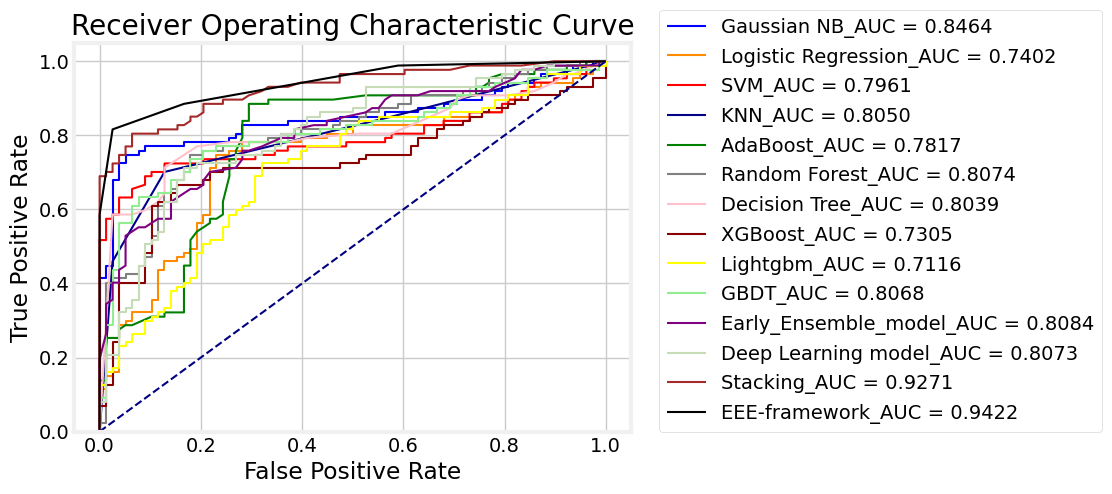

In [35]:
roc_auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_ada= metrics.auc(fpr_ada, tpr_ada)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
roc_auc_lgb = metrics.auc(fpr_lgb, tpr_lgb)
roc_auc_gbdt = metrics.auc(fpr_gbdt, tpr_gbdt)

roc_auc_early=metrics.auc(fpr_early,tpr_early)

roc_auc_stacking=metrics.auc(fpr_stacking,tpr_stacking)
roc_auc_voting = metrics.auc(fpr_voting, tpr_voting)
# 绘制AUC曲线
fig=plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
lw =1.5
plt.plot(fpr_gnb, tpr_gnb, color='blue',lw=lw, label='Gaussian NB_AUC = %0.4f' % roc_auc_gnb)
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='Logistic Regression_AUC = %0.4f' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='red',lw=lw, label='SVM_AUC = %0.4f' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, color='darkblue',lw=lw, label='KNN_AUC = %0.4f' % roc_auc_knn)
plt.plot(fpr_ada, tpr_ada, color='green',lw=lw, label='AdaBoost_AUC = %0.4f' % roc_auc_ada)
plt.plot(fpr_rf, tpr_rf, color='gray', lw=lw, label='Random Forest_AUC = %0.4f' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='pink',lw=lw, label='Decision Tree_AUC = %0.4f' % roc_auc_dt)
plt.plot(fpr_xgb, tpr_xgb, color='darkred',lw=lw, label='XGBoost_AUC = %0.4f' % roc_auc_xgb)
plt.plot(fpr_lgb, tpr_lgb, color='yellow',lw=lw, label='Lightgbm_AUC = %0.4f' % roc_auc_lgb)
plt.plot(fpr_gbdt, tpr_gbdt, color='lightgreen',lw=lw, label='GBDT_AUC = %0.4f' % roc_auc_gbdt)

plt.plot(fpr_early,tpr_early,color='purple',lw=lw,label='Early_Ensemble_model_AUC = %0.4f' % roc_auc_early)
plt.plot(fpr_deep, tpr_deep, color='#C6DCB9', lw=1.5, label='Deep Learning model_AUC = %0.4f' % roc_auc_deep)

plt.plot(fpr_stacking,tpr_stacking,color='brown',lw=lw, label='Stacking_AUC = %0.4f' % roc_auc_stacking)
plt.plot(fpr_voting, tpr_voting, color='black',lw=lw, label='EEE-framework_AUC = %0.4f' % roc_auc_voting)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc=(1.05,0),facecolor='white')
plt.show()

In [36]:
df_std_ci

,Model,fold_accuracies,overall_accuracy,std_dev_acc,confidence_interval_acc,fold_precisions,overall_precision,std_dev_pre,confidence_interval_pre,fold_recalls,overall_recall,std_dev_rec,confidence_interval_rec,fold_f1s,overall_f1,std_dev_f1,confidence_interval_f1
0,SVC,"[0.7647058823529411, 0.8823529411764706, 0.941...",0.806061,0.081771,"(0.743855321969414, 0.8671740897952918)","[0.7777777777777778, 0.8888888888888888, 1.0, ...",0.866667,0.078945,"(0.8049951743449943, 0.9240524447026248)","[0.7777777777777778, 0.8888888888888888, 0.888...",0.747126,0.119024,"(0.6546942584898313, 0.8341946303990574)","[0.7777777777777778, 0.8888888888888888, 0.941...",0.802469,0.096027,"(0.7240306644618182, 0.8688501801837323)"
1,SVC+,"[0.8235294117647058, 0.7058823529411765, 0.882...",0.800000,0.081449,"(0.7389505455477078, 0.8617847485699394)","[1.0, 0.75, 0.8888888888888888, 0.777777777777...",0.875000,0.088371,"(0.8139586981253715, 0.947231778065105)","[0.6666666666666666, 0.6666666666666666, 0.888...",0.724138,0.120450,"(0.6355635938488731, 0.8172141839289047)","[0.8, 0.7058823529411765, 0.8888888888888888, ...",0.792453,0.092486,"(0.7203731312512127, 0.8598509583846414)"
2,KNN,"[0.7058823529411765, 0.7647058823529411, 0.705...",0.709091,0.101622,"(0.63145967548212, 0.7847167951061154)","[0.8333333333333334, 1.0, 1.0, 0.8333333333333...",0.882353,0.157198,"(0.7681313795084403, 1.005201953824893)","[0.5555555555555556, 0.5555555555555556, 0.444...",0.517241,0.118414,"(0.4259870511018202, 0.6045685044537352)","[0.6666666666666667, 0.7142857142857143, 0.615...",0.652174,0.126679,"(0.5512569439262061, 0.7423028296335676)"
3,KNN+,"[0.7058823529411765, 0.9411764705882353, 0.705...",0.781818,0.086677,"(0.7162583287716698, 0.8469769653459772)","[0.75, 1.0, 0.8333333333333334, 0.857142857142...",0.859155,0.106541,"(0.7812103482622267, 0.9418848898330113)","[0.6666666666666666, 0.8888888888888888, 0.555...",0.701149,0.122356,"(0.606348048911114, 0.7908741733111083)","[0.7058823529411765, 0.9411764705882353, 0.666...",0.772152,0.101738,"(0.6905059569148716, 0.8439375046802927)"
4,LR,"[0.8235294117647058, 0.7058823529411765, 0.764...",0.721212,0.077795,"(0.6611911577334234, 0.7785147246195178)","[0.8, 0.75, 0.7777777777777778, 0.75, 0.875, 0...",0.746988,0.083312,"(0.6832351307724581, 0.8088788663415388)","[0.8888888888888888, 0.6666666666666666, 0.777...",0.712644,0.154041,"(0.5963446461338067, 0.8286553538661934)","[0.8421052631578948, 0.7058823529411765, 0.777...",0.729412,0.104743,"(0.641652113734229, 0.7996149868981968)"
5,LR+,"[0.8235294117647058, 0.7058823529411765, 0.823...",0.757576,0.093945,"(0.6857780790566869, 0.8274572150609601)","[0.875, 0.7, 0.875, 0.7777777777777778, 0.875,...",0.783133,0.104216,"(0.705503116656679, 0.8626714865179241)","[0.7777777777777778, 0.7777777777777778, 0.777...",0.747126,0.094618,"(0.674486482736195, 0.8171801839304716)","[0.823529411764706, 0.7368421052631577, 0.8235...",0.764706,0.095024,"(0.6917203840766362, 0.8350271219433159)"
6,GNB,"[0.7647058823529411, 0.7647058823529411, 0.764...",0.757576,0.074316,"(0.7013150483209452, 0.813390834031996)","[0.8571428571428571, 1.0, 1.0, 0.8571428571428...",0.873016,0.074355,"(0.8157971553538385, 0.9279330033763206)","[0.6666666666666666, 0.5555555555555556, 0.555...",0.632184,0.151535,"(0.5162899614348161, 0.744821149676295)","[0.75, 0.7142857142857143, 0.7142857142857143,...",0.733333,0.108371,"(0.6407338294418834, 0.8041684904604367)"
7,GNB+,"[0.8235294117647058, 0.7647058823529411, 0.941...",0.836364,0.093212,"(0.7668455276578792, 0.9074191782244738)","[1.0, 1.0, 1.0, 0.875, 0.8333333333333334, 1.0...",0.954545,0.062869,"(0.9123154919610834, 1.0071289524833613)","[0.6666666666666666, 0.5555555555555556, 0.888...",0.724138,0.178563,"(0.5889654655766134, 0.858256756645609)","[0.8, 0.7142857142857143, 0.9411764705882353, ...",0.823529,0.128816,"(0.7140802042710573, 0.9083487066872654)"
8,DT,"[0.7058823529411765, 0.5294117647058824, 0.647...",0.630303,0.079282,"(0.570